Observable Trends

1 - As can be seen in the Latitude vs Max Temperature plots, there is a strong correlation between distance from the equator and temperature. The further you move from the equator, the lower the max temperature. The decrease in temperature when going North of the equator is a lot more rapid.

2 - The scatter plots do not demonstrate any relationship between Latitude and Cloudiness, or Latitude and Humidity.

3 - Without the trendline it does appear that there is a slight relationship between Latitude and Wind Speed. The first plot indicates that there is some correlation between higher latitudes and higher wind speeds, however the trendlines don't really support this.

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import seaborn as sns
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

In [3]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lats_list = []
lngs_list = []
max_temp = []
wind_speed = []
index_counter = 0
set_counter = 1


In [4]:
print("Beginning Data Retrieval ")
print("-------------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
url = f"{base_url}appid={weather_api_key}&units={units}&q="

#For loop matching city names with city_list using enumerate method
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(url + city).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lats_list.append(response["coord"]["lat"])
        lngs_list.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        
        else:
            index_counter = index_counter + 1
        
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
        
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")

Beginning Data Retrieval 
-------------------------------
Processing Record 1 of Set 1 : qaanaaq
Processing Record 2 of Set 1 : port alfred
Processing Record 3 of Set 1 : tazovskiy
Processing Record 4 of Set 1 : vaxjo
Processing Record 5 of Set 1 : luanda
Processing Record 6 of Set 1 : beringovskiy
Processing Record 7 of Set 1 : kaitangata
Processing Record 8 of Set 1 : chokurdakh
Processing Record 9 of Set 1 : arraial do cabo
Processing Record 10 of Set 1 : gongzhuling
Processing Record 11 of Set 1 : avarua
Processing Record 12 of Set 1 : butaritari
Processing Record 13 of Set 1 : yaring
Processing Record 14 of Set 1 : thompson
Processing Record 15 of Set 1 : cape town
Processing Record 16 of Set 1 : chizhou
Processing Record 17 of Set 1 : dalvik
Processing Record 18 of Set 1 : victoria
Processing Record 19 of Set 1 : palmer
Processing Record 20 of Set 1 : saint anthony
Processing Record 21 of Set 1 : aksarayskiy
Processing Record 22 of Set 1 : severo-kurilsk
City not found. Skipping.

Processing Record 32 of Set 4 : muros
Processing Record 33 of Set 4 : maningrida
Processing Record 34 of Set 4 : caravelas
Processing Record 35 of Set 4 : ribeira grande
Processing Record 36 of Set 4 : kloulklubed
Processing Record 37 of Set 4 : marystown
Processing Record 38 of Set 4 : lompoc
Processing Record 39 of Set 4 : oromocto
Processing Record 40 of Set 4 : nishihara
Processing Record 41 of Set 4 : rocha
Processing Record 42 of Set 4 : lesnoy
Processing Record 43 of Set 4 : rabo de peixe
City not found. Skipping...
Processing Record 44 of Set 4 : mantua
Processing Record 45 of Set 4 : riachao
Processing Record 46 of Set 4 : laguna
City not found. Skipping...
Processing Record 47 of Set 4 : saskylakh
Processing Record 48 of Set 4 : norton
Processing Record 49 of Set 4 : genhe
Processing Record 50 of Set 4 : banda aceh
Processing Record 0 of Set 5 : vila velha
Processing Record 1 of Set 5 : san policarpo
Processing Record 2 of Set 5 : whitehorse
Processing Record 3 of Set 5 : pon

Processing Record 16 of Set 8 : biskamzha
Processing Record 17 of Set 8 : san vicente
Processing Record 18 of Set 8 : half moon bay
Processing Record 19 of Set 8 : constitucion
Processing Record 20 of Set 8 : kamaishi
Processing Record 21 of Set 8 : bilibino
Processing Record 22 of Set 8 : ranau
Processing Record 23 of Set 8 : beaverlodge
Processing Record 24 of Set 8 : lappeenranta
Processing Record 25 of Set 8 : isla vista
Processing Record 26 of Set 8 : acapulco
Processing Record 27 of Set 8 : vila
Processing Record 28 of Set 8 : smithers
Processing Record 29 of Set 8 : safranbolu
Processing Record 30 of Set 8 : vidim
Processing Record 31 of Set 8 : yeppoon
Processing Record 32 of Set 8 : deutschlandsberg
Processing Record 33 of Set 8 : alofi
Processing Record 34 of Set 8 : wewak
Processing Record 35 of Set 8 : cepu
Processing Record 36 of Set 8 : paragould
Processing Record 37 of Set 8 : salvador
Processing Record 38 of Set 8 : dubbo
Processing Record 39 of Set 8 : san jeronimo
Pro

In [6]:
weatherpy_df = pd.DataFrame({
    "City" : city_name,
    "Latitude" : lats_list,
    "Longitude" : lngs_list,
    "Max Temperature" : max_temp,
    "Humidity" : humidity,
    "Cloudiness" : cloudiness,
    "Wind Speed" : wind_speed,
    "Country" : country,
    "Date" : date    
})

weatherpy_df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.4840,-69.3632,13.55,70,97,8.88,GL,1638701721
1,Port Alfred,-33.5906,26.8910,72.61,87,100,23.47,ZA,1638701721
2,Tazovsky,67.4667,78.7000,-26.66,99,74,8.03,RU,1638701721
3,Vaxjo,56.8777,14.8091,28.45,86,90,13.80,SE,1638701721
4,Luanda,-8.8368,13.2343,82.40,78,75,4.61,AO,1638701701


In [7]:
weatherpy_df.to_csv(output_data_file)

In [11]:
# to check if any have humidity > 100%
weatherpy_df.describe()

,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,20.765343,22.269596,52.190312,72.910092,61.126606,8.575211,1.638702e+09
std,33.683256,90.744674,30.335140,20.802317,37.885476,7.194800,4.091656e+01
min,-54.800000,-175.200000,-47.830000,10.000000,0.000000,0.000000,1.638701e+09
25%,-8.008900,-54.961400,32.520000,64.000000,20.000000,3.650000,1.638702e+09
50%,27.950000,25.734300,61.200000,77.000000,75.000000,7.000000,1.638702e+09
75%,49.166700,102.265500,77.090000,89.000000,98.000000,11.590000,1.638702e+09
max,78.218600,179.316700,105.300000,100.000000,100.000000,73.460000,1.638702e+09


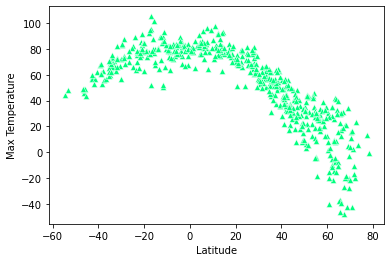

In [30]:
# plotting the data
# lat vs temp

sns.scatterplot(x=weatherpy_df["Latitude"], y=weatherpy_df["Max Temperature"], marker = "^", color = "springgreen")

The above plot shows Latitude against Max Temperature.
The plot shows that cities that are closer to 0 Latitude (the equator) are generally warmer.

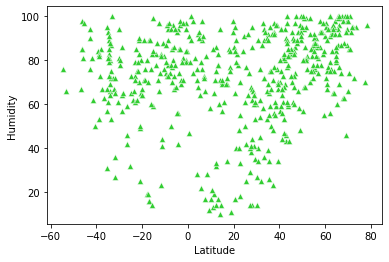

In [31]:
# plotting the data
# lat vs humidity

sns.scatterplot(x=weatherpy_df["Latitude"], y=weatherpy_df["Humidity"], marker="^", color="limegreen")

The above plot shows Latitude against Humidity.The plot doesn't show any clear correlation between Latitude and Humidity.


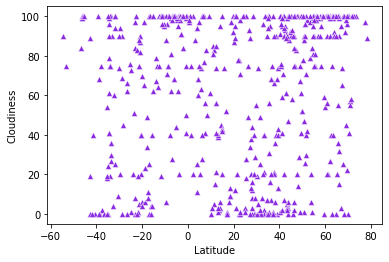

In [32]:
# plotting the data
# lat vs cloudiness

sns.scatterplot(x=weatherpy_df["Latitude"], y=weatherpy_df["Cloudiness"], marker="^", color="blueviolet")

The above plot shows Latitude vs Cloudiness. As with Humidity, the plot shows there is no clear correlation between Latitiude and Cloudiness.

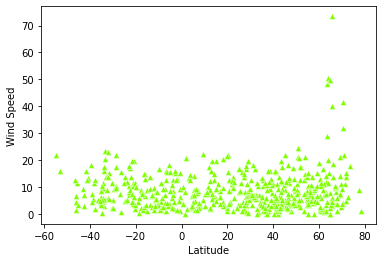

In [33]:
# plotting the data
# lat vs wind speed

sns.scatterplot(x=weatherpy_df["Latitude"], y=weatherpy_df["Wind Speed"], marker="^", color="chartreuse")

The above plot shows Latitude against Wind Speed. The plot does show that there is some correlation with cities with a higher latitude and higher wind speeds.

In [34]:
# split the data into northern and southern hemisphere

north_hemi_df = weatherpy_df.loc[(weatherpy_df["Latitude"]>0)]
south_hemi_df = weatherpy_df.loc[(weatherpy_df["Latitude"]<0)]

Text(10, -20, 'y= -1.42x + 99.35')

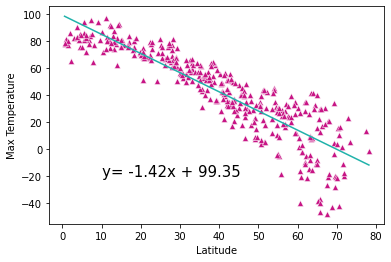

In [49]:
#linear regression for northern hemisphere lat vs temp

x_cor = north_hemi_df["Latitude"]
y_cor = north_hemi_df["Max Temperature"]

(n_slope, n_int, nr, np, n_stderr) = st.linregress(x_cor, y_cor)

n_line_eq = "y= " + str(round(n_slope,2)) + "x + " + str(round(n_int,2))

n_regress = x_cor * n_slope + n_int

sns.scatterplot(x=x_cor, y=y_cor, marker="^", color="mediumvioletred")
sns.lineplot(x=x_cor, y=n_regress, color="lightseagreen")
plt.annotate(n_line_eq,(10,-20),fontsize=15,color="black")

Text(-50, 90, 'y= 0.55x + 85.46')

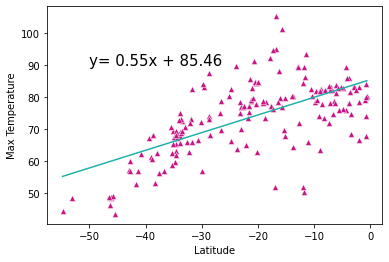

In [51]:
# linear regression for southern hemisphere lat vs temp

x_cors = south_hemi_df["Latitude"]
y_cors = south_hemi_df["Max Temperature"]

(s_slope, s_int, sr, sp, s_stderr) = st.linregress(x_cors, y_cors)

s_line_eq = "y= " + str(round(s_slope,2)) + "x + " + str(round(s_int,2))

s_regress = x_cors * s_slope + s_int

sns.scatterplot(x=x_cors, y=y_cors, marker="^", color="mediumvioletred")
sns.lineplot(x=x_cors, y=s_regress, color="lightseagreen")
plt.annotate(s_line_eq,(-50,90),fontsize=15,color="black")

The above plots are Latitude against Max Temperature separated into Northern and Southern hemispheres. The plots show a strong negative correlation on the Northern hemisphere plot, which shows temperature decreasing as we get further from the equator, as well as a strong positive correlation on the Southern hemisphere plot, which shows temperature increasing as we get closer to the equator.

Text(45, 20, 'y= 0.47x + 53.91')

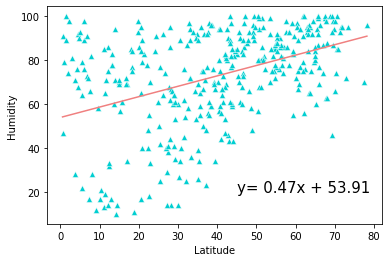

In [58]:
# linear regression for northern hemisphere lat vs humidity

x_corh = north_hemi_df["Latitude"]
y_corh = north_hemi_df["Humidity"]

(h_slope, h_int, hr, hp, h_stderr) = st.linregress(x_corh, y_corh)

h_line_eq = "y= " + str(round(h_slope,2)) + "x + " + str(round(h_int,2))

h_regress = x_corh * h_slope + h_int

sns.scatterplot(x=x_corh, y=y_corh, marker="^", color="darkturquoise")
sns.lineplot(x=x_corh, y=h_regress, color="lightcoral")
plt.annotate(h_line_eq,(45,20),fontsize=15,color="black")

Text(-55, 20, 'y= 0.09x + 74.76')

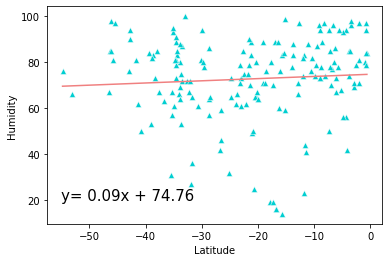

In [61]:
x_corhs = south_hemi_df["Latitude"]
y_corhs = south_hemi_df["Humidity"]

(hs_slope, hs_int, hsr, hsp, hs_stderr) = st.linregress(x_corhs, y_corhs)

hs_line_eq = "y= " + str(round(hs_slope,2)) + "x + " + str(round(hs_int,2))

hs_regress = x_corhs * hs_slope + hs_int

sns.scatterplot(x=x_corhs, y=y_corhs, marker="^", color="darkturquoise")
sns.lineplot(x=x_corhs, y=hs_regress, color="lightcoral")
plt.annotate(hs_line_eq,(-55,20),fontsize=15,color="black")

The above plots show Latitude against Humidity for the northern and southern hemispheres. The trendline on the Northern hemisphere plot does show a slightly positive correlation between Latitude and Humidity, however there are far too many outliers on the plot for this to be a true positive relationship. The Southern hemisphere plot again shows no correlation/relationship between Latitude and Humidity.

Text(45, 5, 'y= 0.53x + 38.83')

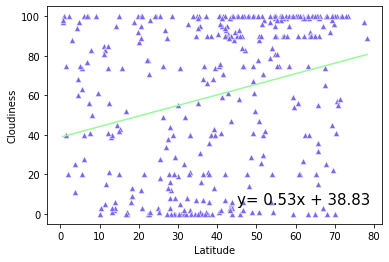

In [66]:
# linear regression for northern hemisphere lat vs cloudiness

x_corc = north_hemi_df["Latitude"]
y_corc = north_hemi_df["Cloudiness"]

(c_slope, c_int, cr, cp, c_stderr) = st.linregress(x_corc, y_corc)

c_line_eq = "y= " + str(round(c_slope,2)) + "x + " + str(round(c_int,2))

c_regress = x_corc * c_slope + c_int

sns.scatterplot(x=x_corc, y=y_corc, marker="^", color="mediumslateblue")
sns.lineplot(x=x_corc, y=c_regress, color="palegreen")
plt.annotate(c_line_eq,(45,5),fontsize=15,color="black")

Text(-55, 5, 'y= 0.78x + 79.23')

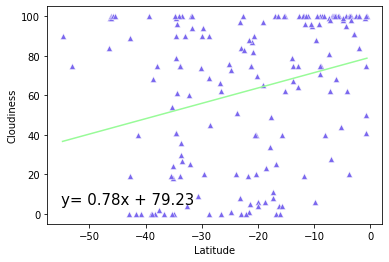

In [69]:
# linear regression for southern hemisphere lat vs cloudiness

x_corcs = south_hemi_df["Latitude"]
y_corcs = south_hemi_df["Cloudiness"]

(cs_slope, cs_int, csr, csp, cs_stderr) = st.linregress(x_corcs, y_corcs)

cs_line_eq = "y= " + str(round(cs_slope,2)) + "x + " + str(round(cs_int,2))

cs_regress = x_corcs * cs_slope + cs_int

sns.scatterplot(x=x_corcs, y=y_corcs, marker="^", color="mediumslateblue")
sns.lineplot(x=x_corcs, y=cs_regress, color="palegreen")
plt.annotate(cs_line_eq,(-55,5),fontsize=15,color="black")

The above plots show Latitude against Cloudiness for the Northern and Southern hemispheres.The trendlines for both plots show a slightly positive correlation, however when looking at both plots, the trends contradict each other. The Northern plot shows a slight positive relation between cloudiness and moving further from the equator, however the Southern plot shows a slight positive relation between cloudiness and moving closer to the equator.

Text(0, 70, 'y= 0.06x + 6.32')

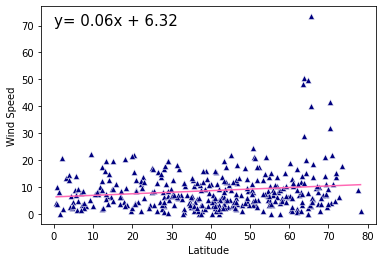

In [72]:
# linear regression for northern hemisphere lat vs wind speed

x_corw = north_hemi_df["Latitude"]
y_corw = north_hemi_df["Wind Speed"]

(w_slope, w_int, wr, wp, w_stderr) = st.linregress(x_corw, y_corw)

w_line_eq = "y= " + str(round(w_slope,2)) + "x + " + str(round(w_int,2))

w_regress = x_corw * w_slope + w_int

sns.scatterplot(x=x_corw, y=y_corw, marker="^", color="navy")
sns.lineplot(x=x_corw, y=w_regress, color="hotpink")
plt.annotate(w_line_eq,(0,70),fontsize=15,color="black")

Text(-25, 20, 'y= -0.07x + 6.94')

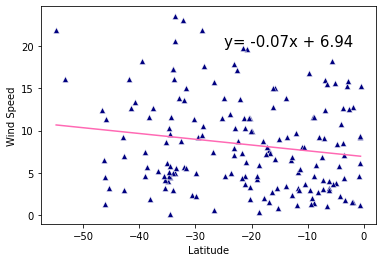

In [79]:
# linear regression for southern hemisphere lat vs wind speed

x_corws = south_hemi_df["Latitude"]
y_corws = south_hemi_df["Wind Speed"]

(ws_slope, ws_int, wsr, wsp, ws_stderr) = st.linregress(x_corws, y_corws)

ws_line_eq = "y= " + str(round(ws_slope,2)) + "x + " + str(round(ws_int,2))

ws_regress = x_corws * ws_slope + ws_int

sns.scatterplot(x=x_corws, y=y_corws, marker="^", color="navy")
sns.lineplot(x=x_corws, y=ws_regress, color="hotpink")
plt.annotate(ws_line_eq,(-25,20),fontsize=15,color="black")

The above plots show Latitude against Wind Speed for the Northern and Southern hemispheres. Neither of the trendlines show any strong correlation. 